## This is a simplified version of Dirac_matrix_4lineari with products of gamma matrices in place of Pauli sigma matrices 

In [1]:
from sympy import *
init_printing(use_unicode = True)
from sympy.physics.secondquant import *
from IPython.display import display, Math
from sympy.physics.quantum import *

# FERMIONIC ALGEBRA

fu1 = symbols('a_{u_1}', commutative=False)
fdu1 = symbols('a_{u_1}^\dagger', commutative=False)
fd1 = symbols('a_{d_1}', commutative=False)
fdd1 = symbols('a_{d_1}^\dagger', commutative=False)
fu2 = symbols('a_{u_2}', commutative=False)
fdu2 = symbols('a_{u_2}^\dagger', commutative=False)
fd2 = symbols('a_{d_2}', commutative=False)
fdd2 = symbols('a_{d_2}^\dagger', commutative=False)

fermi  = Matrix([fu1,fd1,fu2,fd2])
fermid = Matrix([fdu1,fdd1,fdu2,fdd2])
ops = [fdu1,fu1,fdd1,fd1,fdu2,fu2,fdd2,fd2]

def dictionarize(strl):
    d = []
    counter = 0
    for i in strl:
        v = []
        if (i == fdu1) or (i == fu1):
            v.append(i)
            v.append(1+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdd1) or (i == fd1):
            v.append(i)
            v.append(100+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdu2) or (i == fu2):
            v.append(i)
            v.append(200+counter)
            d.append(v)
            counter = counter + 1
        elif (i == fdd2) or (i == fd2):
            v.append(i)
            v.append(300+counter)
            d.append(v)
            counter = counter + 1
        elif i not in ops:
            v.append(i)
            v.append(0)
            d.append(v) # for numerical coefficients
    return d

def bubble_sort(strl):
    bubbles = dictionarize(strl)
    
    swapped = True
    asign = 1
    while swapped:
        swapped = False
        for i in range(len(bubbles)-1):
            if bubbles[i][1] > bubbles[i+1][1]:
                bubbles[i], bubbles[i+1] = bubbles[i+1], bubbles[i]
                asign = asign * (-1) # Update sign due to CAR
                #print(asign)
                #display(Math(latex(bubbles)))
                swapped = True
    
    strl.clear()
    for i in bubbles:
        strl.append(i[0])
            
    strl.append(asign)
    return strl

def subd(expr):
    return expr.subs({
        fu1*fu1 : 0,
        fdu1*fdu1 : 0,
        fd1*fd1 : 0,
        fdd1*fdd1 : 0,
        fu2*fu2 : 0,
        fdu2*fdu2 : 0,
        fd2*fd2 : 0,
        fdd2*fdd2 : 0
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    }).subs({
        fdu1*fu1*fdu1*fu1 : fdu1*fu1,
        fdd1*fd1*fdd1*fd1 : fdd1*fd1,
        fdu2*fu2*fdu2*fu2 : fdu2*fu2,
        fdd2*fd2*fdd2*fd2 : fdd2*fd2,
    })

def fermionize(expr): 
    listexpr = [x.as_ordered_factors() for x in expr.as_ordered_terms()]
    listprov = []
    for i in listexpr:
        listprov.append(bubble_sort(i))
    
    exprout = 0
    for i in range(len(listprov)):
        prod = 1
        for j in range(len(listprov[i])):
            prod = prod*listprov[i][j]
            
        exprout = exprout + prod
        
    return subd(exprout)
    
mixed2= [fdu1*fu1,\
         fdd1*fd1,\
         fdu1*fd1,\
         fu1*fdd1,\
         fdu2*fu2,\
         fdd2*fd2,\
         fdu2*fd2,\
         fu2*fdd2,\
         fdu1*fd2,\
         fd1*fdu2,\
         fdd1*fu2,\
         fu1*fdd2,\
         fdu1*fu2,\
         fu1*fdu2,\
         fdd1*fd2,\
         fd1*fdd2]

         
mixed4 = [fd1*fdu2*fdd2*fd2,\
         fd1*fdu2*fu2*fdd2,\
         fdd1*fd1*fdd2*fd2,\
         fdd1*fd1*fdu2*fd2,\
         fdd1*fd1*fdu2*fu2,\
         fdd1*fd1*fu2*fdd2,\
         fdd1*fdu2*fu2*fd2,\
         fdd1*fu2*fdd2*fd2,\
         fdu1*fd1*fdd2*fd2,\
         fdu1*fd1*fdu2*fd2,\
         fdu1*fd1*fdu2*fu2,\
         fdu1*fd1*fu2*fdd2,\
         fdu1*fdd1*fd1*fd2,\
         fdu1*fdd1*fd1*fu2,\
         fdu1*fdd1*fu2*fd2,\
         fdu1*fdu2*fu2*fd2,\
         fdu1*fu1*fd1*fdd2,\
         fdu1*fu1*fd1*fdu2,\
         fdu1*fu1*fdd1*fd1,\
         fdu1*fu1*fdd1*fd2,\
         fdu1*fu1*fdd1*fu2,\
         fdu1*fu1*fdd2*fd2,\
         fdu1*fu1*fdu2*fd2,\
         fdu1*fu1*fdu2*fu2,\
         fdu1*fu1*fu2*fdd2,\
         fdu1*fu2*fdd2*fd2,\
         fdu2*fu2*fdd2*fd2,\
         fu1*fd1*fdu2*fdd2,\
         fu1*fdd1*fd1*fdd2,\
         fu1*fdd1*fd1*fdu2,\
         fu1*fdd1*fdd2*fd2,\
         fu1*fdd1*fdu2*fd2,\
         fu1*fdd1*fdu2*fu2,\
         fu1*fdd1*fu2*fdd2,\
         fu1*fdu2*fdd2*fd2,\
         fu1*fdu2*fu2*fdd2]

  
mixed6 = [fdd1*fd1*fdu2*fu2*fdd2*fd2,\
         fu1*fdd1*fdu2*fu2*fdd2*fd2,\
         fu1*fdd1*fd1*fdu2*fdd2*fd2,\
         fu1*fdd1*fd1*fdu2*fu2*fdd2,\
         fdu1*fd1*fdu2*fu2*fdd2*fd2,\
         fdu1*fu1*fdu2*fu2*fdd2*fd2,\
         fdu1*fu1*fd1*fdu2*fdd2*fd2,\
         fdu1*fu1*fd1*fdu2*fu2*fdd2,\
         fdu1*fdd1*fd1*fu2*fdd2*fd2,\
         fdu1*fu1*fdd1*fu2*fdd2*fd2,\
         fdu1*fu1*fdd1*fd1*fdd2*fd2,\
         fdu1*fu1*fdd1*fd1*fu2*fdd2,\
         fdu1*fdd1*fd1*fdu2*fu2*fd2,\
         fdu1*fu1*fdd1*fdu2*fu2*fd2,\
         fdu1*fu1*fdd1*fd1*fdu2*fd2,\
         fdu1*fu1*fdd1*fd1*fdu2*fu2]
    
mixed8 = [fdu1*fu1*fdd1*fd1*fdu2*fu2*fdd2*fd2]

terms = mixed2 + mixed4 + mixed6 + mixed8 # List with all concatenated

num_term = len(mixed2) + len(mixed4) + len(mixed6) + len(mixed8) # generate coefficients

aliases = []
for i in range(0,num_term):
    strg = str(i+1)
    if i<len(mixed2):
        aliases.append(symbols('B_'+strg))
    if i >=len(mixed2) and i<(len(mixed2)+len(mixed4)):
        aliases.append(symbols('Q_'+strg))
    if i>=(len(mixed2)+len(mixed4)) and i<(len(mixed2)+len(mixed4)+len(mixed6)):
        aliases.append(symbols('T_'+strg))
    if i>=(len(mixed2)+len(mixed4)+len(mixed6)):
        aliases.append(symbols('Z_'+strg))
        
Id = Matrix([[1,0],[0,1]]) 
sx = Matrix([[0,1],[1,0]])
sy = Matrix([[0,-I],[I,0]])
isy = I*sy
sz = Matrix([[1,0],[0,-1]])

s = [sx,sy,sz]
s_for_gamma = [sx,isy,sz,Id]
names = ['sx','isy','sz','Id']

In [2]:
g0 = TensorProduct(sz,Id)
g1 = TensorProduct(isy,sx)
g2 = TensorProduct(isy,sy)
g3 = TensorProduct(isy,sz)
g5 = TensorProduct(sx,Id)
gammas = [g0,g1,g2,g3,g5]
gammas_names = ['g0','g1','g2','g3','g5']

transf = []
for i in s:
    transf.append(TensorProduct(Id,i))

In [3]:
listlambdas = [\
                0,\
                symbols('\lambda_'+str(18)),\
                symbols('\lambda_'+str(19)),\
                0,\
                symbols('\lambda_'+str(21)),\
                0,\
                conjugate(symbols('\lambda_'+str(18))),\
                0,\
                0,\
                symbols('\lambda_'+str(26)),\
                0,\
                symbols('\lambda_'+str(28)),\
                0,\
                symbols('\lambda_'+str(30)),\
                symbols('\lambda_'+str(31)),\
                0,\
                conjugate(symbols('\lambda_'+str(30))),\
                0,\
                symbols('\lambda_'+str(35)),\
                symbols('\lambda_'+str(30)),\
                0,\
                symbols('\lambda_'+str(21)),\
                0,\
                symbols('\lambda_'+str(19)),\
                0,\
                conjugate(symbols('\lambda_'+str(18))),\
                symbols('\lambda_'+str(43)),\
                conjugate(symbols('\lambda_'+str(31))),\
                0,\
                conjugate(symbols('\lambda_'+str(30))),\
                0,\
                symbols('\lambda_'+str(28)),\
                0,\
                symbols('\lambda_'+str(26)),\
                symbols('\lambda_'+str(18)),\
                0]

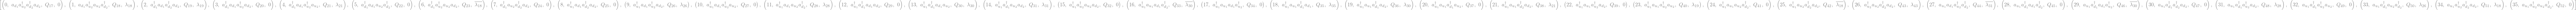

In [4]:
listalias = list(zip(list(i for i in range(len(mixed4))), mixed4,aliases[16:52],listlambdas))
listalias

In [5]:
difermi = TensorProduct(fermi, fermi)
difermid = TensorProduct(fermid, fermid)

In [6]:
import itertools #for combination

combs4 = list(itertools.product(s_for_gamma, repeat=4))
combnames = list(itertools.product(names, repeat=4))

list4 = list(zip(combnames,combs4)) 
# list of tuples each one containing something like ( (names),((matrices tuple)) )
# ES.
# (('sx', 'sx', 'sx', 'sx'),
# (Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]]),
#  Matrix([
#  [0, 1],
#  [1, 0]])))

inv4 = []
for i in list4:
    prod = []
    for j in s:
        fact = 1
        
        var1 = j*i[1][1]*j
        if var1 == -(i[1][1]):
            fact = fact * (-1)
            
        var2 = j*i[1][3]*j
        if var2 == -(i[1][3]):
            fact = fact * (-1)
        
        prod.append(fact)
        
    if prod == [1,1,1]:
        inv4.append(i)
len(inv4)

In [7]:
coeff_names = []
for i in range(len(inv4)):
    strg = str(i+1)
    coeff_names.append(symbols('b_'+ strg))

In [8]:
mat4info = []
for i in range(len(inv4)):
    mat4info.append( ( coeff_names[i], inv4[i][0], inv4[i][1] ) )
# mat4info is a list of tuples consisting of a coefficient, one tuple with strings and one with the corresponding matrices

In [9]:
mat4 = zeros(16,16)
for i in mat4info:
    mat4 = mat4 + i[0]*TensorProduct(i[2][0],i[2][1],i[2][2],i[2][3])

In [10]:
poly4  = fermionize(expand((difermid.T*mat4*difermi)[0]))
for i in range(len(mixed4)):
    poly4 = poly4.subs(mixed4[i],aliases[len(mixed2)+i])

for i in aliases:
    poly4 = collect(poly4, i)

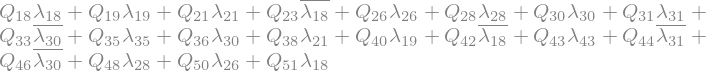

In [11]:
poly42 = 0
for i in listalias:
    poly42 += i[2]*i[3]
    
for i in aliases:
    poly42 = collect(poly42, i)
poly42

In [12]:
subtr = poly4-poly42

for i in aliases:
    subtr = collect(subtr, i)

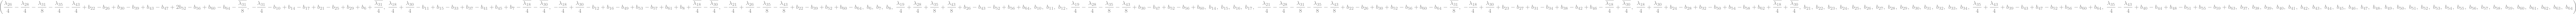

In [13]:
tests = [x.as_ordered_factors() for x in subtr.as_ordered_terms()]
system = []
for i in tests:
    system.append(i[1])

soluz = list(linsolve(system,tuple(coeff_names)))[0]
soluz

In [14]:
simplified = []
for i in list(soluz):
    for j in coeff_names:
        i=i.subs(j,0)
    simplified.append(i)

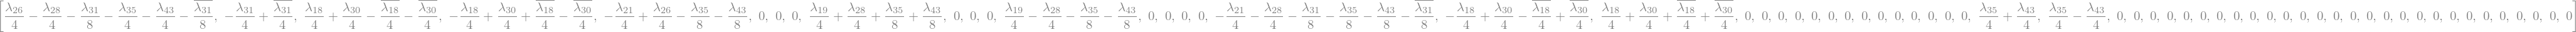

In [15]:
simplified

In [16]:
base = []
for i in range(len(simplified)):
    if simplified[i]!=0:
        base.append((simplified[i],inv4[i][1],inv4[i][0]))

In [17]:
for i in base:
    print(i[2])

('sx', 'sx', 'sx', 'sx')
('sx', 'sx', 'isy', 'sx')
('sx', 'sx', 'sz', 'sx')
('sx', 'sx', 'Id', 'sx')
('sx', 'isy', 'sx', 'isy')
('sx', 'sz', 'sx', 'sz')
('sx', 'Id', 'sx', 'Id')
('isy', 'sx', 'isy', 'sx')
('isy', 'sx', 'sz', 'sx')
('isy', 'sx', 'Id', 'sx')
('sz', 'sx', 'sz', 'sx')
('sz', 'sx', 'Id', 'sx')


In [18]:
matfin = zeros(16,16)
for i in base:
    matfin += i[0]*TensorProduct(i[1][0],i[1][1],i[1][2],i[1][3])

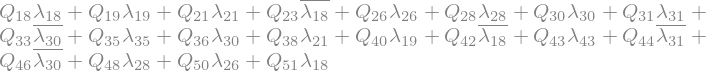

In [19]:
poly4c  = fermionize(expand((difermid.T*matfin*difermi)[0]))
for i in range(len(mixed4)):
    poly4c = poly4c.subs(mixed4[i],aliases[len(mixed2)+i])

for i in aliases:
    poly4c = collect(poly4c, i)
poly4c

Let's do it again with gamma matrices

In [18]:
# Queste sono, a meno di segni e fattori i, i prodotti tensori di gamma o prodotti di gamma 
# corrispondenti ai prodotti tensori di sigma che abbiamo salvato

gammabuild = [TensorProduct(g0*g1,g0*g1),\
              TensorProduct(g0*g1,g1),\
              TensorProduct(g0*g1,g5*g1),\
              TensorProduct(g0*g1,g5*g0*g1),\
              TensorProduct(g0*g2,g0*g2),\
              TensorProduct(g0*g3,g0*g3),\
              TensorProduct(g5,g5),\
              TensorProduct(g1,g1),\
              TensorProduct(g1,g5*g1),\
              TensorProduct(g1,g5*g0*g1),\
              TensorProduct(g5*g1,g5*g1),\
              TensorProduct(g5*g1,g5*g0*g1),\
             ]

In [19]:
for i in gammabuild:
    counter = 0
    for j in transf:
        if TensorProduct(j,j)*i*TensorProduct(j,j)-i == zeros(16,16):
            counter += 1
    if counter == len(transf):
        print('It is invariant')

È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante
È invariante


In [20]:
gammabuildcoeff = list(zip(gammabuild,coeff_names))

In [21]:
matgamma = zeros(16,16)
for i in gammabuildcoeff:
    matgamma = matgamma + i[1]*i[0]

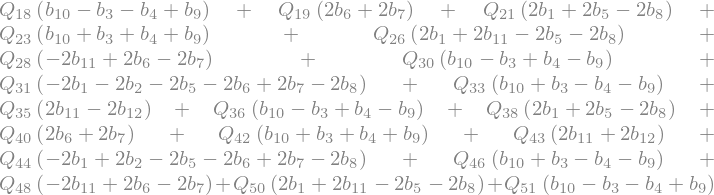

In [22]:
poly4  = fermionize(expand((difermid.T*matgamma*difermi)[0]))
for i in range(len(mixed4)):
    poly4 = poly4.subs(mixed4[i],aliases[len(mixed2)+i])

for i in aliases:
    poly4 = collect(poly4, i)
poly4

In [23]:
subtr = poly4-poly42

for i in aliases:
    subtr = collect(subtr, i)

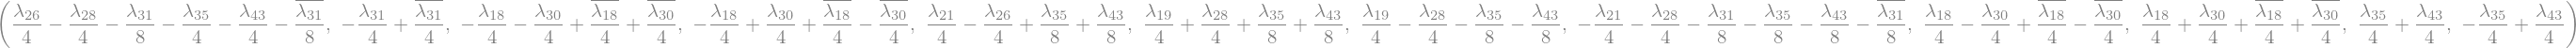

In [24]:
tests = [x.as_ordered_factors() for x in subtr.as_ordered_terms()]
system = []
for i in tests:
    system.append(i[1])

soluz = list(linsolve(system,tuple(coeff_names[:12])))[0]
soluz

In [25]:
polycheck = 0
for i in range(len(gammabuild)):
    polycheck += soluz[i]*fermionize(expand((difermid.T*gammabuild[i]*difermi)[0]))
polyfins = expand(polycheck)

for i in range(len(mixed4)):
    polyfins = polyfins.subs(mixed4[i],aliases[len(mixed2)+i])

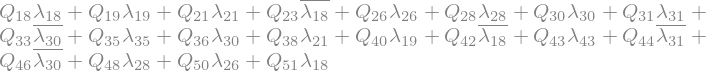

In [26]:
polyfins

In [27]:
tests2 = [x.as_ordered_factors() for x in poly4.as_ordered_terms()]
system2 = []
for i in tests2:
    system2.append(i[1])

soluz2 = list(linsolve(system2,tuple(coeff_names[:12])))[0]
soluz2

# TeX friendly notation 

In [29]:
gammabuild_names = [ symbols('\gamma_{0}\gamma_{1}\otimes\gamma_{0}\gamma_{1}'),\
                    symbols('\gamma_{0}\gamma_{1}\otimes\gamma_{1}'),\
                    symbols('\gamma_{0}\gamma_{1}\otimes\gamma_{5}\gamma_{1}'),\
                    symbols('\gamma_{0}\gamma_{1}\otimes\gamma_{2}\gamma_{3}'),\
                    symbols('\gamma_{0}\gamma_{2}\otimes\gamma_{0}\gamma_{2}'),\
                    symbols('\gamma_{0}\gamma_{3}\otimes\gamma_{0}\gamma_{3}'),\
                    symbols('\gamma_{5}\otimes\gamma_{5}'),\
                    symbols('\gamma_{1}\otimes\gamma_{1}'),\
                    symbols('\gamma_{1}\otimes\gamma_{5}\gamma_{1}'),\
                    symbols('\gamma_{1}\otimes\gamma_{2}\gamma_{3}'),\
                    symbols('\gamma_{5}\gamma_{1}\otimes\gamma_{5}\gamma_{1}'),\
                    symbols('\gamma_{5}\gamma_{1}\otimes\gamma_{2}\gamma_{3}') ]
gammabuild_names

In [30]:
da_scrivere = 0
for i in range(len(gammabuild_names)):
    da_scrivere += expand(soluz[i]*gammabuild_names[i])

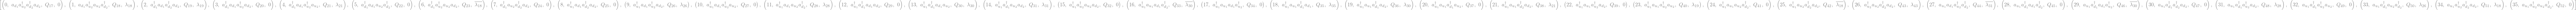

In [31]:
listalias

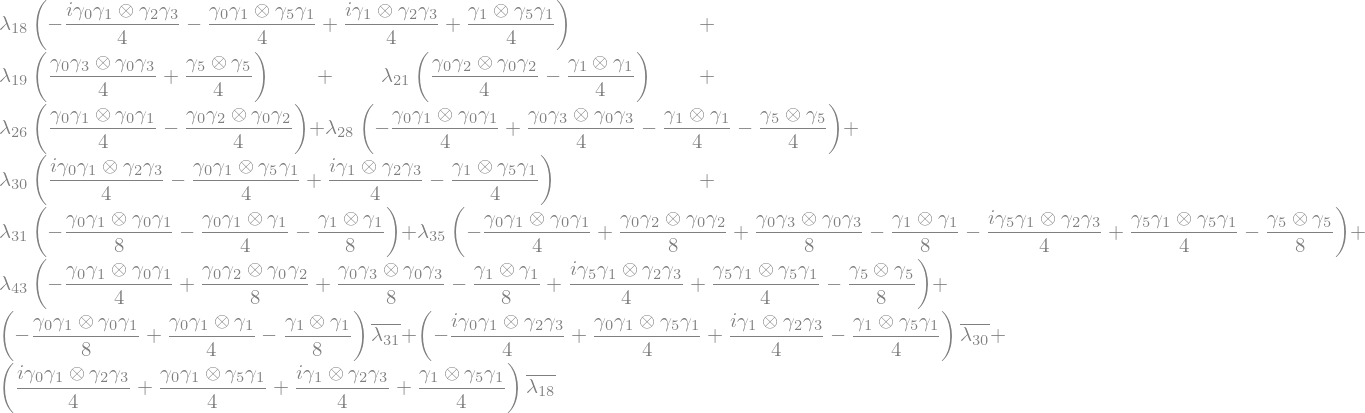

In [32]:
for j in listalias:
    da_scrivere = collect(da_scrivere, j[3])
da_scrivere

## Mapping

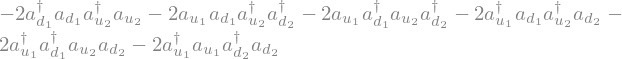

In [29]:
g1g1 = fermionize(expand((difermid.T*TensorProduct(g1,g1)*difermi)[0]))
g1g1

In [31]:
for i in listalias:
    g1g1 = g1g1.subs(i[1],i[3])
g1g1

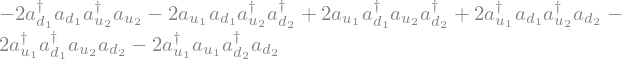

In [32]:
g2g2 = fermionize(expand((difermid.T*TensorProduct(g2,g2)*difermi)[0]))
g2g2

In [34]:
def subber(gk):
    dummy = fermionize(expand((difermid.T*TensorProduct(gk,gk)*difermi)[0]))
    for i in listalias:
        dummy = dummy.subs(i[1],i[3])
    return dummy

In [35]:
subber(g1)

In [36]:
subber(g2)

In [37]:
subber(g3)

In [38]:
subber(g0)

In [39]:
def subber2(gk,gh):
    dummy = fermionize(expand((difermid.T*TensorProduct(gk,gh)*difermi)[0]))
    for i in listalias:
        dummy = dummy.subs(i[1],i[3])
    return dummy

In [40]:
subber2(g1,)